<a href="https://colab.research.google.com/github/awhb/ml-colaboratory/blob/main/Malaria_Detection_neuralearn_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

Credits to: Malaria Detection by neuralearn.ai

**STEP 1: DATA PREPARATION**

---




In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [ ]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))
  val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))
  test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))

  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = split(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

**STEP 2: DATA VISUALISATION**


---



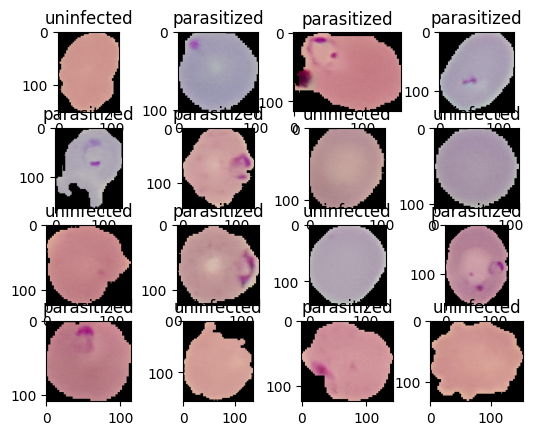

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

**3. DATA PREPROCESSING**


---

In [ ]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8,
                                      reshuffle_each_iteration = True)\
                                      .batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8,
                                      reshuffle_each_iteration = True)\
                                      .batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 8,
                                      reshuffle_each_iteration = True)\
                                      .batch(32).prefetch(tf.data.AUTOTUNE)

**4. Model Creation**

---

In [ ]:
lenet_model = tf.keras.Sequential([InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

                             Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2, strides=2),

                             Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2, strides=2),

                             Flatten(),

                             Dense(100, activation='relu'),
                             BatchNormalization(),
                             Dense(10, activation='relu'),
                             BatchNormalization(),
                             Dense(1, activation='sigmoid'),
                             ])

lenet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 53, 53, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 44944)             0         
                                                                 
 dense_24 (Dense)            (None, 100)              

In [ ]:
lenet_model.compile(optimizer=Adam(learning_rate = 0.01),
              loss=BinaryCrossentropy())

In [ ]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
  1/689 [..............................] - ETA: 18:05 - loss: 0.6921